# Give Me Some Credit
Este reto busca dar apoyo a los análisis de riesgo y puntaje crediticio que se implementan en las entidades financieras para hacer prestamos a sus clientes. Con los datos proveídos se busca predecir la probabilidad de que una persona sufra una mora de más de 90 días en los próximos 2 años.

**Autores**
- Federico Ocampo Ortiz - 1039464102 - federico.ocampoo@udea.edu.co
- Andres Felipe Orrego Quintero - 1041204802 - andres.orrego2@udea.edu.co

**Materia:** Seminario

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

Facultad de Ingeniería - Universidad de Antioquia

## Preparación de Datos

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Separación dataset
from sklearn import metrics # Metricas para la evaluación
from sklearn.neighbors import LocalOutlierFactor

#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('cs-training.csv')

In [5]:
d.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [6]:
#Borrando columnas que no se emplearán
d.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [8]:
matrizCorr = d.corr()

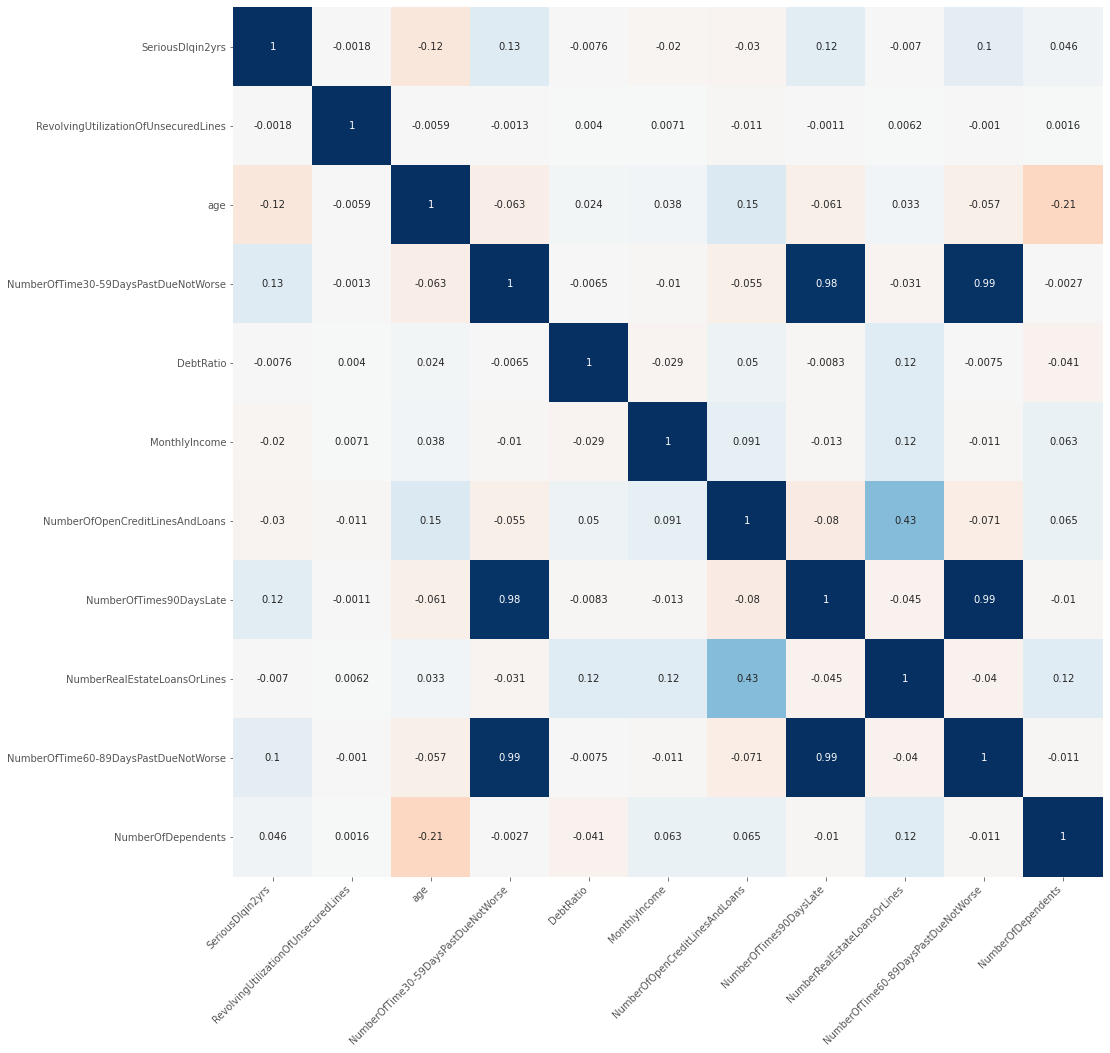

In [9]:
# Mapa de calor (Heatmap) de la matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(26, 16))

sns.heatmap(
    matrizCorr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu', #sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

los campos que empiezan por number of time, tienen una correlación casi de 1, por lo que son redundanres, lo mejor es eliminar dos de ellos para mejor desempeño del modelo

In [10]:
#Borrando columnas que no se emplearán ya que tienen una correlación muy alta

d.drop(['NumberOfTimes90DaysLate'], axis='columns', inplace=True)
d.drop(['NumberOfTime60-89DaysPastDueNotWorse'], axis='columns', inplace=True)

In [11]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

#Se elimina el elemento bad_credit de la lista de variables Categóricas
numCols.remove('SeriousDlqin2yrs')

d[numCols].head()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,6,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,1,0.0


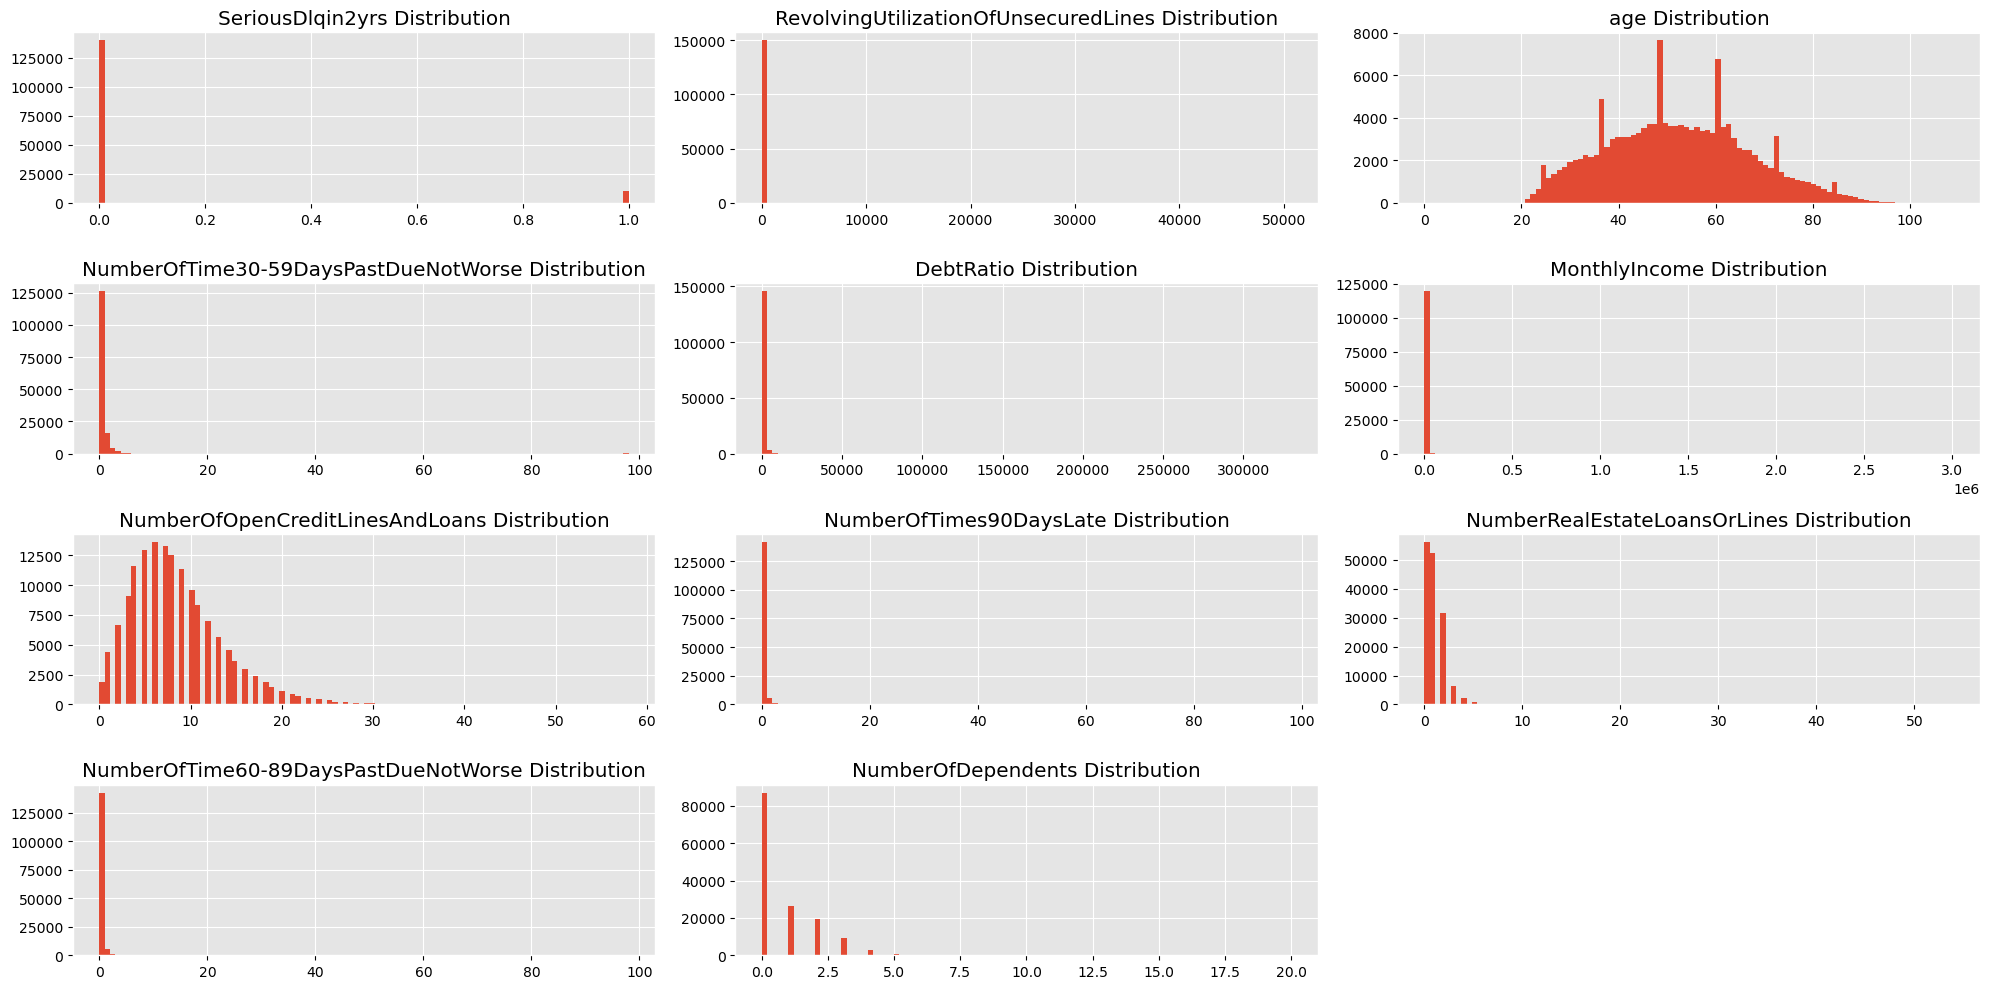

In [42]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(d, d.columns, 4, 3)

In [9]:
d.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Se encuentra un único registro con `age` igual a cero que es imputado con la media de esta variable. Los valores desconocidos de `MonthlyIncome` son remplazados por la media. Por ultimo los valores nulos de `NumberOfDependents` son imputados con la media de la caracteristica.

In [10]:
def imputaciones(): 
    d.loc[d["age"] == 0, "age"] = d["age"].median()
    d["MonthlyIncome"] = d["MonthlyIncome"].replace(np.nan, d["MonthlyIncome"].median())
    d["NumberOfDependents"].fillna(d["NumberOfDependents"].median(), inplace=True)
imputaciones()

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

### Ajuste de Clases

In [33]:
d.groupby('SeriousDlqin2yrs').SeriousDlqin2yrs.count().sort_values(ascending=False)

SeriousDlqin2yrs
0    10026
1    10026
Name: SeriousDlqin2yrs, dtype: int64

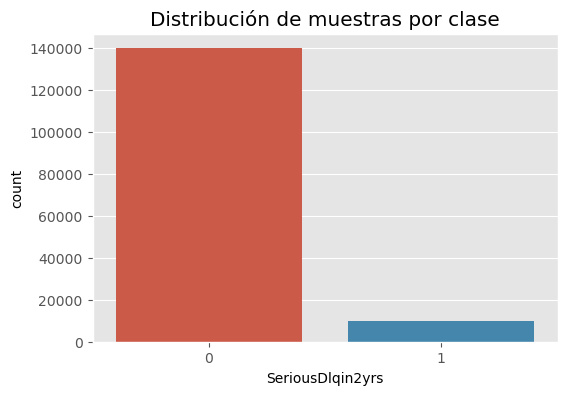

In [32]:
plt.figure(figsize=(6,4))

plt.title('Distribución de muestras por clase')
sns.countplot(x=d2["SeriousDlqin2yrs"])

plt.show()  

Las clases están desbalanceadas, por tal razón, se realiza el proceso de undersampling en la variable negativa (SeriousDlqin2yrs = 0). Otra alternativa sería hacer un sobre muestreo en la clase positiva. 

In [14]:
len1 = len(d[d["SeriousDlqin2yrs"]==1])

undersampled_data = pd.concat([ d[d["SeriousDlqin2yrs"]==0].sample(len1) , d[d["SeriousDlqin2yrs"]==1] ])
undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20052 entries, 90755 to 149979
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      20052 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 2   age                                   20052 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  20052 non-null  int64  
 4   DebtRatio                             20052 non-null  float64
 5   MonthlyIncome                         20052 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 7   NumberOfTimes90DaysLate               20052 non-null  int64  
 8   NumberRealEstateLoansOrLines          20052 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  20052 non-null  int64  
 10  NumberOfDependents                    20052 non-null  float64
dtypes: float64

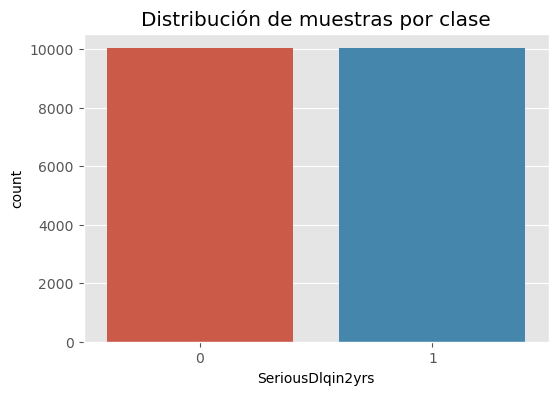

In [35]:
plt.figure(figsize=(6,4))

plt.title('Distribución de muestras por clase')
sns.countplot(x=undersampled_data["SeriousDlqin2yrs"])

plt.show()  

In [16]:
undersampled_data.info()
d=undersampled_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20052 entries, 90755 to 149979
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      20052 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 2   age                                   20052 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  20052 non-null  int64  
 4   DebtRatio                             20052 non-null  float64
 5   MonthlyIncome                         20052 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 7   NumberOfTimes90DaysLate               20052 non-null  int64  
 8   NumberRealEstateLoansOrLines          20052 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  20052 non-null  int64  
 10  NumberOfDependents                    20052 non-null  float64
dtypes: float64

### Detección de Atípicos

In [17]:
# crear un objeto LocalOutlierFactor con n_neighbors=14
lof = LocalOutlierFactor(n_neighbors=14, contamination=0.1)

y_pred = lof.fit_predict(d[numCols])

outliers = y_pred == -1

print(f"Valores atípicos detectados: {np.count_nonzero(outliers)}")
#print('Indices de valores atípicos: ', d[outliers].index.tolist())

Valores atípicos detectados: 2006


In [18]:
df = d[~outliers]

In [19]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000,18046.000000
mean,0.498892,0.509219,48.830045,0.804777,318.293683,5883.860634,8.023329,0.579851,0.990192,0.449961,0.846337
std,0.500013,0.546022,13.624127,4.873582,1006.553807,4603.400077,5.038061,4.853683,1.212507,4.805605,1.172439
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.075357,39.000000,0.000000,0.193658,3500.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.449188,48.000000,0.000000,0.404853,5400.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.940817,58.000000,1.000000,0.937267,6698.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,42.000000,95.000000,98.000000,14089.000000,97000.000000,57.000000,98.000000,29.000000,98.000000,10.000000


## Implementación Modelo

In [20]:
# Variables de entrada X y la variable de salida Y
X = df[numCols]
y = df['SeriousDlqin2yrs']

In [21]:
# Se hace la separación del dataset para entrenamiento y evaluación.
# 30% sería para evaluación y 70% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y.values.reshape(-1,1),
    train_size = 0.7,
    random_state=282,
    shuffle=True
)

In [22]:
scaler = MinMaxScaler()
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_test[numCols] = scaler.fit_transform(X_test[numCols])

X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
33185,0.026463,0.391892,0.010204,0.232296,0.055670,0.122807,0.000000,0.034483,0.0,0.0
7861,0.016351,0.486486,0.000000,0.000019,0.051546,0.175439,0.000000,0.000000,0.0,0.2
8745,0.031087,0.148649,0.010204,0.060982,0.055670,0.052632,0.000000,0.000000,0.0,0.1
65515,0.025351,0.094595,0.010204,0.000012,0.046392,0.052632,0.030612,0.000000,0.0,0.0
50339,0.000000,0.040541,0.000000,0.000000,0.000010,0.070175,0.000000,0.000000,0.0,0.0


### Entrenamiento

In [23]:
# Entrenamiento de multiples modelos

# Maquinas de soporte vectorial
modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
# Regresión logistica
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
# Clasificador de K Neighbors
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
# Complemento del Naive Bayes
modelComplNB   = ComplementNB().fit(X_train, y_train)
# Arboles de decision
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
# Gradient Boosting
modelGD = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05,
                                     max_depth=5, random_state=231) \
                                     .fit(X_train, y_train)
# Random forest
modelRanForest = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 'auto', criterion = 'gini', random_state=0).fit(X_train, y_train)
# Redes neuronales - Prospectos
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)
# ModelXGB
modelXGB = XGBClassifier( n_estimators = 150, learning_rate=0.05, max_depth = 5) \
                .fit(X_train, y_train)


0.80: SVC(kernel='linear', probability=True)
0.77: LogisticRegression(random_state=0)
0.77: KNeighborsClassifier(n_neighbors=31)
0.75: ComplementNB()
0.86: RandomForestClassifier(max_depth=5, max_features='auto', random_state=0)
0.89: GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=150,
                           random_state=231)
0.89: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
          

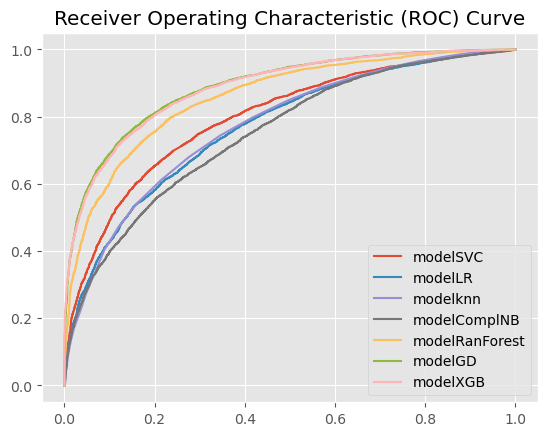

In [24]:
models = [
    ('modelSVC', modelSVC),
    ('modelLR', modelLR),
    ('modelknn', modelknn),
    ('modelComplNB', modelComplNB),
    ('modelRanForest', modelRanForest),
    ('modelGD', modelGD),
    ('modelXGB', modelXGB)
]

for name, model in models:    
    # aqui se hace la curva roc con X_train
    prob = model.predict_proba(X_train)
    preds = prob[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    auc = metrics.auc(fpr, tpr)
    print("{:.2f}: {}".format(auc, model))
    plt.plot(fpr, tpr, label=name)

plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

In [25]:
def testModel(name, model, x, y):
    scores_prob = model.predict_proba(x)
    preds = scores_prob[:,1]
    fpr, tpr, _ = metrics.roc_curve(y, preds)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    plt.plot(fpr, tpr, label=name)
    plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
    plt.legend()  # Mostrar la leyenda de los modelos
    plt.show()  # Mostrar el gráfico



0.846257618963919


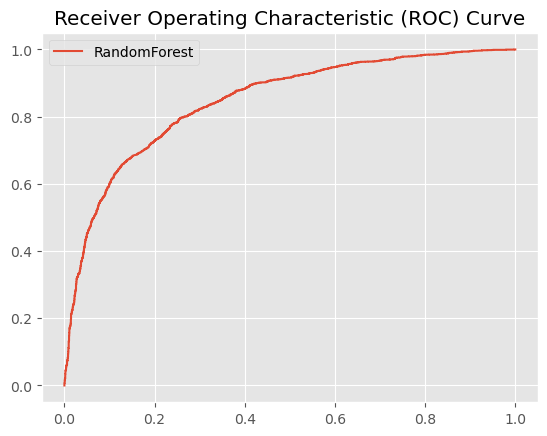

In [34]:
testModel("RandomForest", modelRanForest, X_test, y_test)

Los modelos con mejor puntaje fueron el GradientBoosting y el XGBoost con 0.90 y 0.89, respectivamente. A continuación vamos a evaluar su puntaje con los datos de prueba.

0.8216096634063742


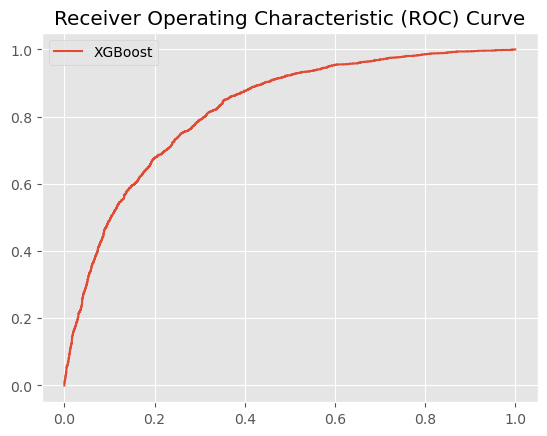

In [27]:
testModel("XGBoost", modelXGB, X_test, y_test)

0.7874088672021275


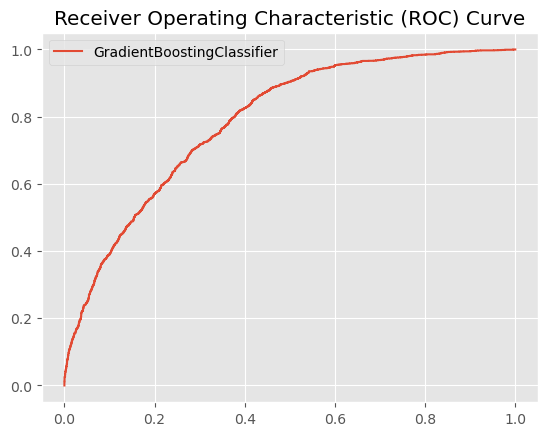

In [28]:
testModel("GradientBoostingClassifier", modelGD, X_test, y_test)

### Validación Cruzada

In [29]:
# Validación cruzada en todos los modelos
cv = 6
scoring = ['accuracy', 'precision', 'recall', 'f1']

models = [
    ('modelRanForest', modelRanForest),
    ('modelGD', modelGD),
    ('modelXGB', modelXGB)
]

cv_df = pd.DataFrame()

for name, model in models:
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelRanForest,0.766290,0.763384,0.770000,0.766678
1,modelRanForest,0.783577,0.781830,0.785476,0.783649
2,modelRanForest,0.784242,0.792181,0.769487,0.780669
3,modelRanForest,0.780585,0.783930,0.773484,0.778672
4,modelRanForest,0.779182,0.779786,0.776667,0.778223
5,modelRanForest,0.770203,0.765943,0.776667,0.771268
6,modelGD,0.774601,0.772546,0.776667,0.774601
7,modelGD,0.787899,0.782211,0.796802,0.789439
8,modelGD,0.787899,0.794138,0.776149,0.785040
9,modelGD,0.786902,0.798197,0.766822,0.782195


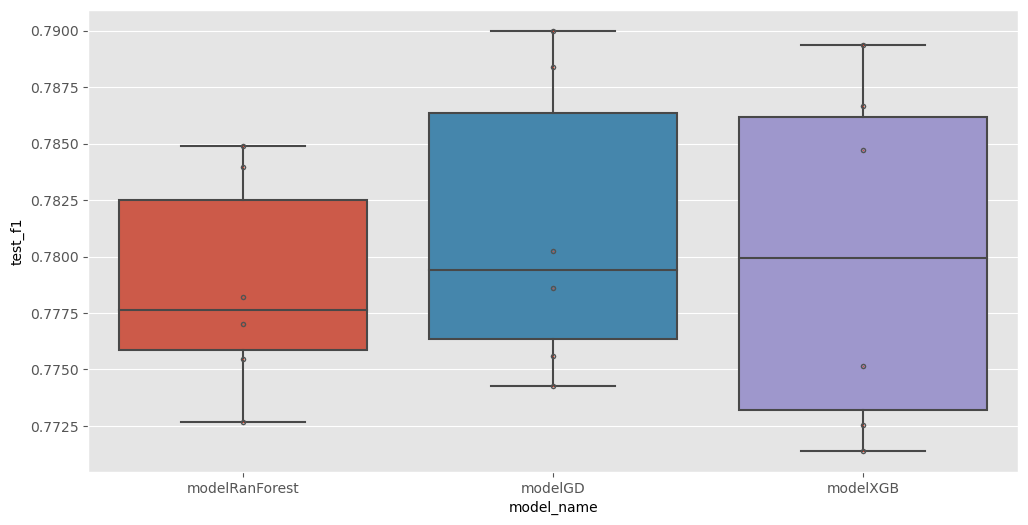

In [37]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df, 
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

## Evaluación de los modelos

In [38]:
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN      = ModelNN.predict(X_test)
y_XGB      = modelXGB.predict(X_test)
y_GD      = modelGD.predict(X_test)

In [39]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelSVC      :",metrics.accuracy_score(y_test, y_SVC      ))
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN       :",metrics.accuracy_score(y_test, y_NN      ))
print("ModelXGB       :",metrics.accuracy_score(y_test, y_XGB      ))
print("ModelGD       :",metrics.accuracy_score(y_test, y_GD      ))

===== Accuracy de los modelos ====================

modelSVC      : 0.7149981529368304
modelLR       : 0.7065016623568526
modelknn      : 0.680273365349095
modelComplNB  : 0.7059475434059845
modelTreeClas : 0.6784263021795346
modelRanForest: 0.7680088659032139
ModelNN       : 0.7489841152567418
ModelXGB       : 0.7683782785371259
ModelGD       : 0.768562984854082


# Conclusiones
- El modelo de XGBoost ofrece mejores resultados para la predicción de la variable de salida. También pueden tenerse en cuenta otros modelos como GradientBoosting y RandomForest para optimización y refinamiento del modelo.
- Como la variable de salida esta desbalanceada con una razón de 14:1, se podría hacer un sobremuestreo en vez de un submuestreo para así no perder información potencialmente útil para el modelo.
- Otras técnicas de ensamble como stacking podrían ser aplicadas al conjunto de datos para obtener mejores resultados.
- Para encontrar los mejores parametros para cada uno de los modelos desarrollados, se recomienda usar metodos de optimización de hiperparametros como el gridsearch.
- Se podrían hacer tareas de selección de caracteristicas para ver aquellas caracteristicas que son más relevantes para el modelo. Sin embargo, como el dataset no cuenta con muchas caracteristicas, puede prescindirse de esta práctica.
- Algunos valores en las caracteristicas parecen extremos o errores de digitación. Estos deben revisarse más a fondo y hacer la transformación o limpieza correspondiente. Por ejemplo las caracteristicas `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse` y `NumberOfTim90DaysLate` cuentan con valores muy grandes que no son coherentes con las columnas.